Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [66]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Defining the path for train and test images from the local system.
data_dir_train = pathlib.Path("C:\\Users\\hp\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train")
data_dir_test  = pathlib.Path("C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [74]:
###The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of 
#shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor 
#of the shape `(32,)`, these are corresponding labels to the 32 images.

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
# Count the number of image in Train and Test directory
# Using the glob to retrieve files/pathnames matching a specified pattern.

#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Found 2239 files belonging to 9 classes.


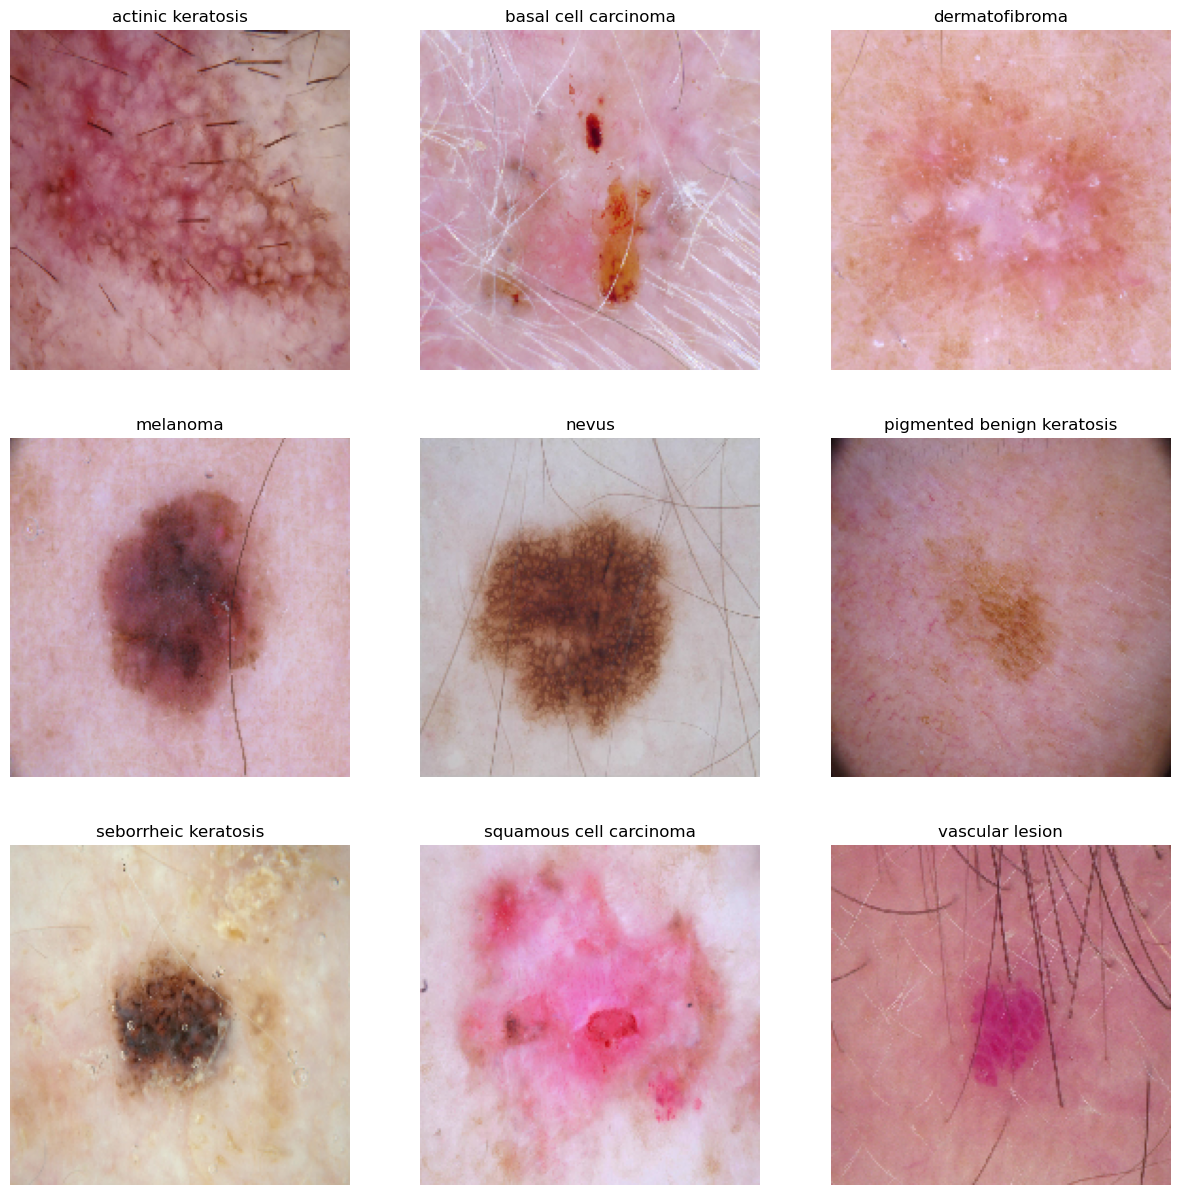

In [6]:
#Visualize one instance of all the class present in the dataset.
from tensorflow.keras.preprocessing.image import load_img
#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [7]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [7]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

In [13]:
#install Augmentor
!pip install Augmentor

In [ ]:
# Iterate through each class
import Augmentor
path_to_training_dataset=data_dir_train

for class_name in class_names:
    p = Augmentor.Pipeline((path_to_training_dataset / class_name).as_posix())
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

In [8]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


In [9]:
# train dataset 
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes),
#representing a one-hot encoding of the class index.

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:

## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.1369 - loss: 3.0300 - val_accuracy: 0.2058 - val_loss: 2.0264
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.2111 - loss: 2.0181 - val_accuracy: 0.2953 - val_loss: 2.0031
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.2515 - loss: 4.2120 - val_accuracy: 0.1790 - val_loss: 4.4032
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.1635 - loss: 4.2600 - val_accuracy: 0.1790 - val_loss: 4.4032
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.1580 - loss: 4.2656 - val_accuracy: 0.1790 - val_loss: 4.4032
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.1436 - loss: 4.6375 - val_accuracy: 0.1790 - val_loss: 4.4032
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.1558 - loss: 4.4252 - val_accuracy: 0.1790 - val_loss: 4.4032
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.1593 - loss: 4.3018 - val_accu

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

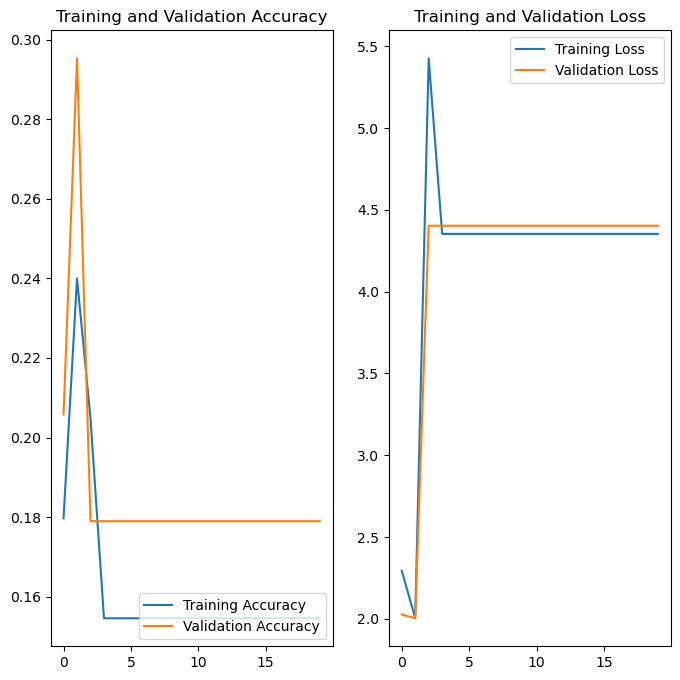

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
### your code goes here, you can use training or validation data to visualize

In [19]:
### Your code goes here
num_classes = 9

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.1567 - loss: 10.9451 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.1747 - loss: 13.1093 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.1662 - loss: 12.9232 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.1723 - loss: 13.1256 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1704 - loss: 13.0728 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.1660 - loss: 13.0630 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.1561 - loss: 13.1633 - val_accuracy: 0.1499 - val_loss: 13.1958
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1840 - loss: 13.1848 - val_accuracy: 0.1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [ ]:
###TensorFlow's tf.data API to load and preprocess the training and validation datasets
#for a machine learning model.
# TensorFlow to automatically tune the buffer size used for prefetching data during training
# This transformation caches the dataset in memory after the first epoch, 
#which can speed up subsequent training iterations by avoiding the overhead of loading the data 
#from disk or generating it on the fly.
###  The argument 1000 specifies the size of the shuffle buffer. In this case, the buffer will hold up to 1000 
#samples at a time

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
### create a keras.Sequential model that applies a series of data augmentation transformations to 
#the input images. 

In [13]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(1, 0.5, fill_mode="reflect", interpolation="bilinear", seed=None, fill_value=0.0),
    layers.RandomCrop(img_height, img_width),
  ]
)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


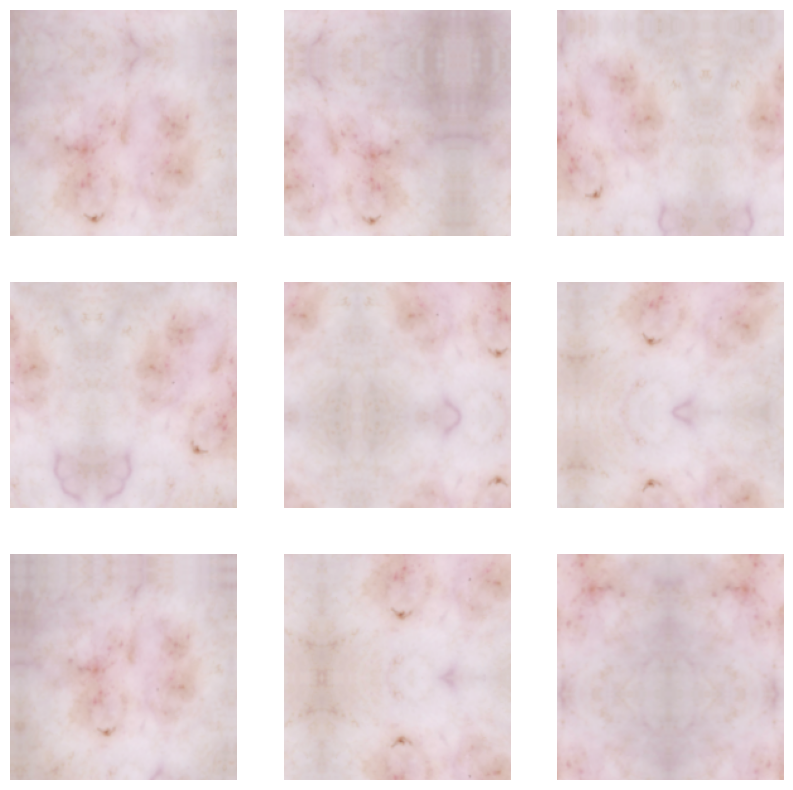

In [23]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [24]:
### Crerate the model
num_classes=9
model = Sequential([
  data_augmentation,
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [25]:
## compile the model with without Dropout and softmax layer
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

56/56 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.1579 - loss: 7.9947 - val_accuracy: 0.1790 - val_loss: 7.7213


In [ ]:
##Accuracy is very very low hence skiped the execution.

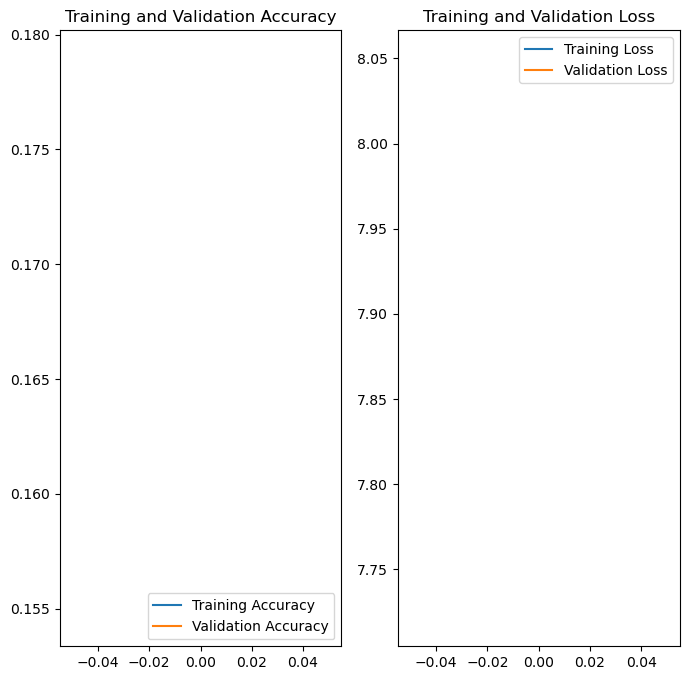

In [30]:
import matplotlib.pyplot as plt
epochs=1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:

# Get the all path list for the images
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

len(path_list)

2239

In [32]:
# Get the original DF from the train folder
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,actinic keratosis
1,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,actinic keratosis
2,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,actinic keratosis
3,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,actinic keratosis
4,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,actinic keratosis
...,...,...
2234,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,vascular lesion
2235,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,vascular lesion
2236,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,vascular lesion
2237,C:\Users\hp\Downloads\Python\NN\SkinCancer_ISI...,vascular lesion


In [72]:
### Get Class distribution

Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


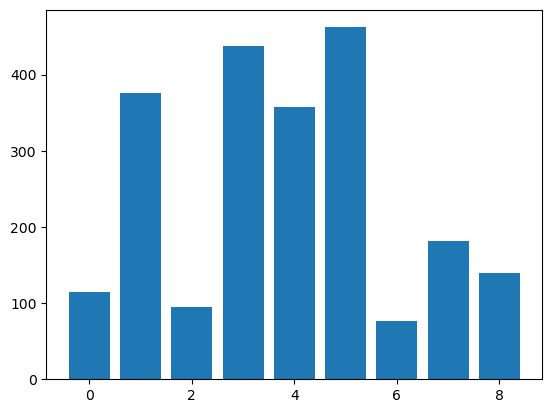

In [33]:

from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [34]:
# created 300 sample for class actinic.

datapath = pathlib.Path("C:\\Users\\hp\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\")
import Augmentor
p = Augmentor.Pipeline(datapath)
#Every function requires you to specify a probability, which is used to decide if an operation is applied to an image as it is passed through the augmentation pipeline.
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
p.sample(300)
p.process()


Initialised with 114 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC1361D10>: 100%|██████████| 300/300 [00:02<00:00, 105.83 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC0D20450>: 100%|██████████| 114/114 [00:01<00:00, 103.35 Samples/s]                  


In [35]:
# GET image count
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

414


In [70]:
### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new , lesion_list_new

(['C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0af39938-73ba-49ae-a857-d5f1e4bc2bbe.jpg',
  'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_17287415-c886-4bfb-8ac4-000e06fa45df.jpg',
  'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2f133f41-bc91-4e97-92f5-7d5902035ff3.jpg',
  'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8042f6c7-c830-4c9a-8fbc-c77bcf712cb2.jpg',
  'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b7a1feb8-703b-4daa-b37b-aeef8d309be1.jpg',
  'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\

In [37]:
# Create images using Augmentor, 500 sample for each class
path_to_training_dataset="C:\\Users\\hp\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC1489310>: 100%|██████████| 500/500 [00:03<00:00, 128.32 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC13731D0>: 100%|██████████| 500/500 [00:04<00:00, 120.93 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC0D1C250>: 100%|██████████| 500/500 [00:04<00:00, 124.26 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22BC1022250>: 100%|██████████| 500/500 [00:23<00:00, 21.25 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x22BC0455310>: 100%|██████████| 500/500 [00:21<00:00, 23.53 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC0C4A590>: 100%|██████████| 500/500 [00:04<00:00, 110.27 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x22BC1456C90>: 100%|██████████| 500/500 [00:10<00:00, 47.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BC134BC50>: 100%|██████████| 500/500 [00:04<00:00, 121.98 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\hp\Downloads\Python\NN\SkinCancer_ISIC_Dataset\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22BBE918250>: 100%|██████████| 500/500 [00:04<00:00, 119.08 Samples/s]                  


In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4914


In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0af39938-73ba-49ae-a857-d5f1e4bc2bbe.jpg',
 'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0b35afda-58bd-4cb1-97bd-53be5818803e.jpg',
 'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_17287415-c886-4bfb-8ac4-000e06fa45df.jpg',
 'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2f133f41-bc91-4e97-92f5-7d5902035ff3.jpg',
 'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4cf86264-45c3-4ff9-8d1e-1f3551a03b01.jpg',
 'C:\\Users\\hp\\Downloads\\Python\\NN\\SkinCancer_ISIC_Dataset\\Train

In [41]:
# get dataset with new columns appended in the dataframe/
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

In [42]:
# View the  class count of each folders
new_df['Label'].value_counts()

Label
actinic keratosis             528
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [43]:
# set batch size and image size.
batch_size = 32
img_height = 180
img_width = 180

In [44]:
#Get the validation dataset from the train datset from the dataset of Train folder.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7153 files belonging to 9 classes.
Using 5723 files for training.


In [45]:
#Get the validation dataset from the train datset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7153 files belonging to 9 classes.
Using 1430 files for validation.


In [47]:
# Set autotune and cache for both train dataset and test dataset.
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
## Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
# Run with 20 epoch 
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 243ms/step - accuracy: 0.2844 - loss: 1.8693 - val_accuracy: 0.4923 - val_loss: 1.3382
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.5178 - loss: 1.2997 - val_accuracy: 0.6140 - val_loss: 1.1428
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.6072 - loss: 1.1205 - val_accuracy: 0.6161 - val_loss: 1.1489
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.6680 - loss: 0.9259 - val_accuracy: 0.6273 - val_loss: 1.0526
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.7202 - loss: 0.7798 - val_accuracy: 0.6860 - val_loss: 0.8815
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.7670 - loss: 0.6353 - val_accuracy: 0.7077 - val_loss: 0.8703
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 233ms/step - accuracy: 0.8129 - loss: 0.5374 - val_accuracy: 0.7846 - val_loss: 0.7080
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.8693 - loss: 0

In [ ]:
# VIsuallize the model accuracy result

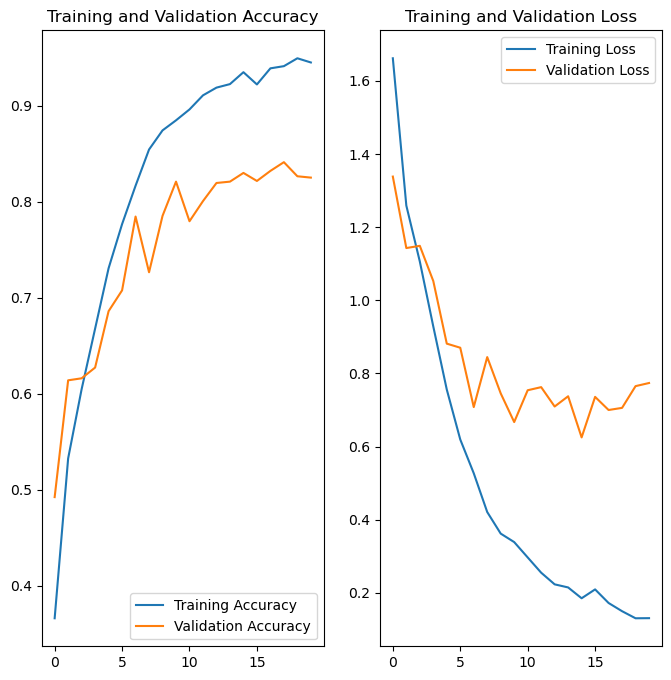

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
# Rescaling Layer
model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

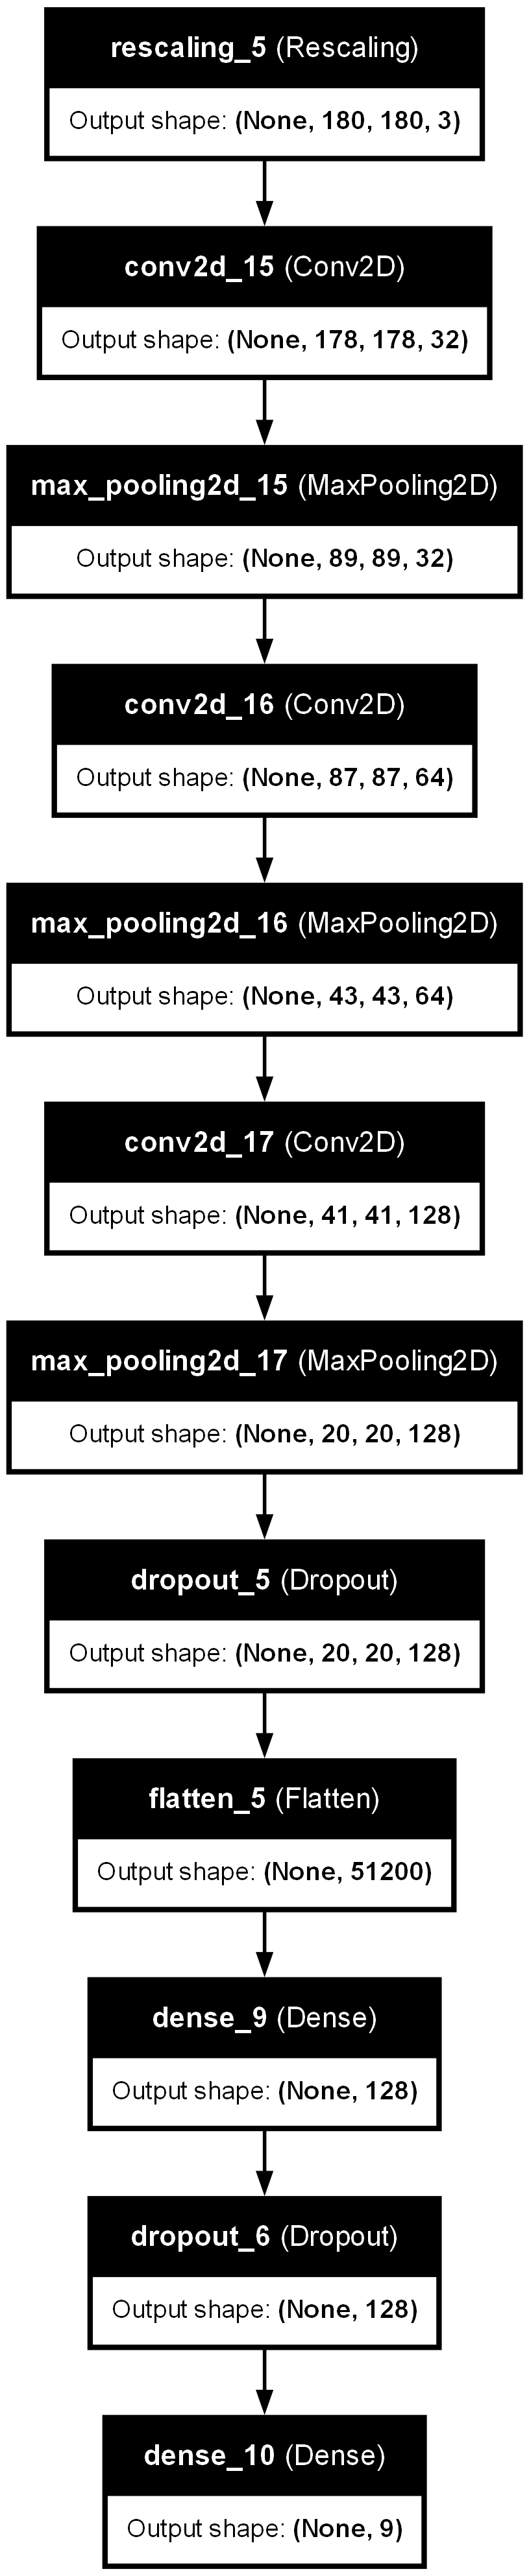

In [60]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model ans set the Checkpoints and run with 20 epochs

In [57]:
# Train the model
#Compile the Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

#model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("my_model1.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.1844 - loss: 2.1360
Epoch 1: val_accuracy improved from -inf to 0.38951, saving model to my_model1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 582ms/step - accuracy: 0.1849 - loss: 2.1348 - val_accuracy: 0.3895 - val_loss: 1.5919
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.4113 - loss: 1.5610
Epoch 2: val_accuracy improved from 0.38951 to 0.52517, saving model to my_model1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 108s 601ms/step - accuracy: 0.4114 - loss: 1.5607 - val_accuracy: 0.5252 - val_loss: 1.3395
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.4963 - loss: 1.3541
Epoch 3: val_accuracy did not improve from 0.52517
179/179 ━━━━━━━━━━━━━━━━━━━━ 115s 641ms/step - accuracy: 0.4963 - loss: 1.3540 - val_accuracy: 0.5154 - val_loss: 1.2967
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.5245 - loss: 1.2486
Epoch 4: val_accuracy did not improve from 0.52517
179/179 ━━━━━━━━━━━━━

In [ ]:
### Visualizing training results

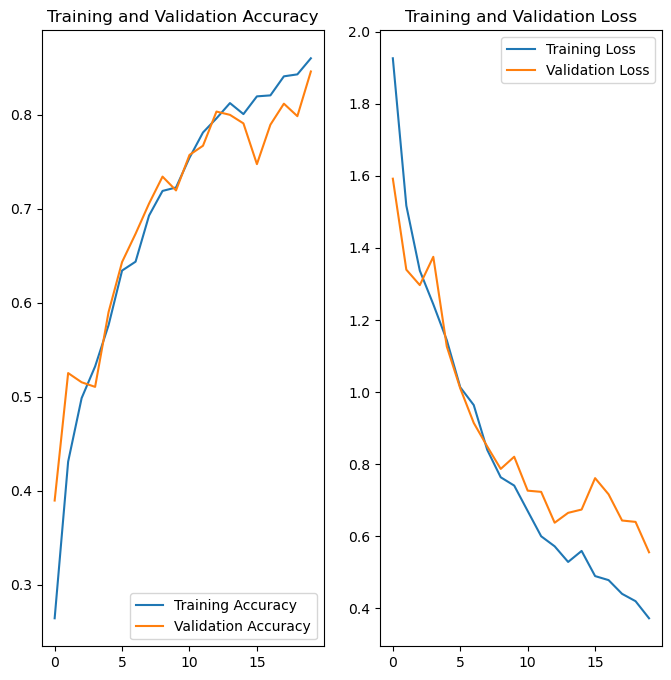

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(epochs)
epochs_range = np.arange(len(acc))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


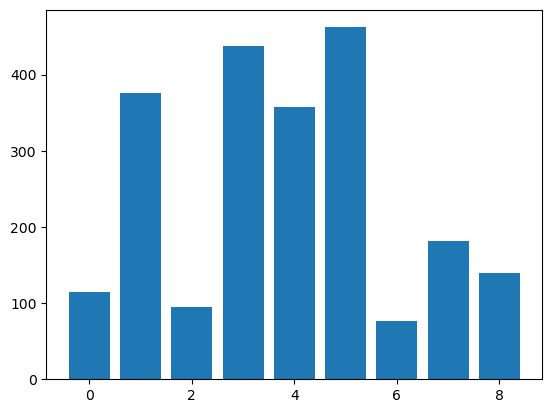

In [62]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
#['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 
#'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 
#'vascular lesion']

In [66]:
7th number class has lowest samples
From the above array  "seborrheic keratosis" has the lowest samples.
Class=6, n=77 (3.439%)

SyntaxError: invalid decimal literal (842984472.py, line 1)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='your_optimser',
              loss=your_loss_function_goes_here,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [ ]:
## Your code goes here

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = ## your training code

### Visualizing the results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
class_names = train_ds.class_names
print(class_names)

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
#['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma',
# 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis'
#, 'squamous cell carcinoma', 'vascular lesion']## Your code goes here.

In [ ]:
Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [ ]:
Which class has the least number of samples?
Class=6, n=77 (3.439%)

- Which classes dominate the data in terms proportionate number of samples?
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=1, n=376 (16.793%)
total clases dominated by class 4,5,6,2 is 72.93% 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = # your model fit code

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
The score was very low when the layers used are with out Dropouts and Augmentor.
As they are included the accuracy of train dataset and validation dataset improved significantly.

Epoch 20: val_accuracy improved from 0.81189 to 0.84615, saving model to my_model1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 547ms/step - accuracy: 0.8630 - loss: 0.3811 - val_accuracy: 0.8462 - val_loss: 0.5555
                

In [68]:
import pickle

#model.save('full_model41.h5')
model.save('my_model4.keras')
    
# Load entire model
loaded_model = tf.keras.models.load_model('my_model4.keras')

# Save training history
with open('training_history4.pickle', 'wb') as file:
    pickle.dump(history.history, file)

# Load training history
with open('training_history4.pickle', 'rb') as file:
    loaded_history = pickle.load(file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Actual Class basal cell carcinoma
Predictive Class squamous cell carcinoma


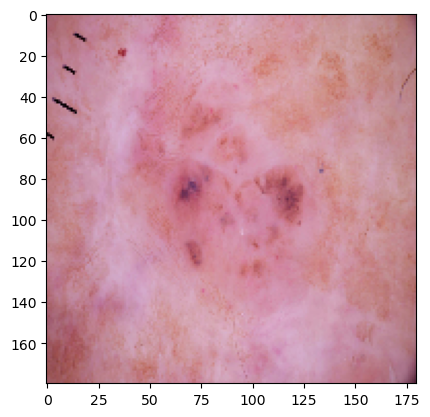

In [69]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

In [ ]:
## END OF Assignment ##